# Notebook contents: 

This notebook contains a lecture. The code for generating plots are found at the of the notebook. Links below.

- [presentation](#Session-11:)
- [code for plots](#Code-for-plots)

# Session 11:
## Linear regression and regularizaton

*Andreas Bjerre-Nielsen*

## Vaaaamos

In [9]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

# Introduction

## It sucks not being able to complete all the exercises...

- We know, we feel sorry, we have been there. The exercises help you grow. Bonus is if you feel bored.

> #### Hadley Wickham

> The bad news is that when ever you learn a new skill you’re going to suck. It’s going to be frustrating. The good news is that is typical and happens to everyone and it is only temporary. You can’t go from knowing nothing to becoming an expert without going through a period of great frustration and great suckiness.

> #### Kosuke Imai

> One can learn data analysis only by doing, not by reading.

## Supervised problems (1)
*How do we distinguish between problems?*

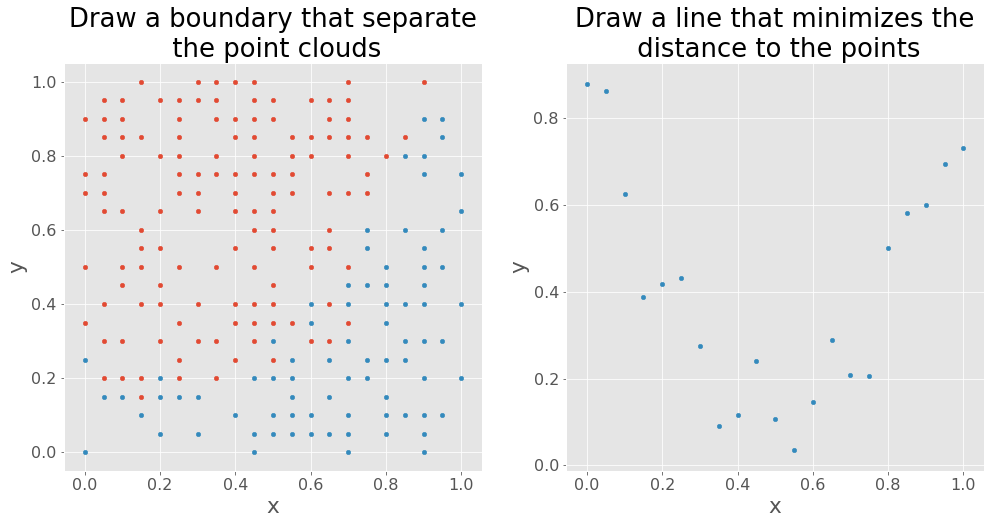

In [8]:
f_identify_question

## Supervised problems (2)
*The two canonical problems*

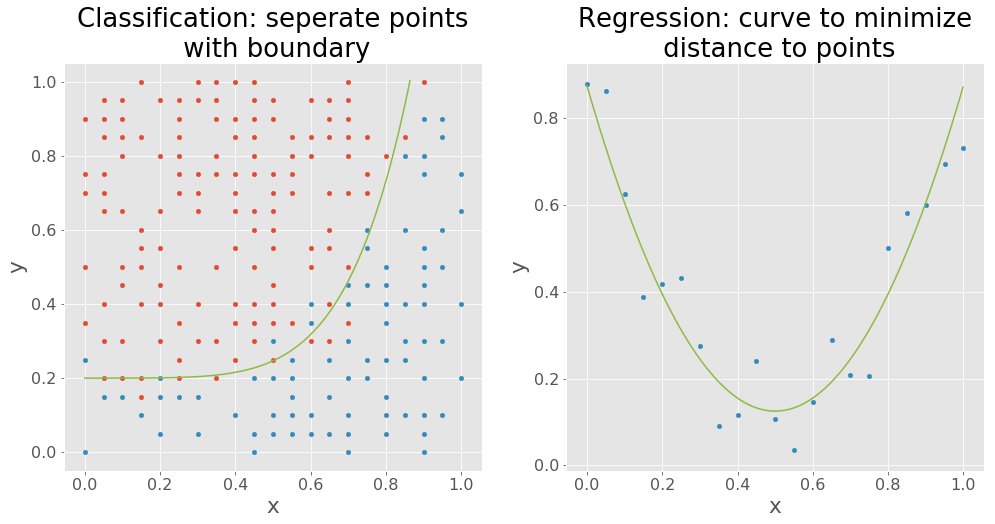

In [9]:
f_identify_answer

## Supervised problems (3)
*Which models have we seen for classification?*

- perceptron

- adaline 

- logistic regression

## Agenda
1. [What is prediction](#What-is-prediction)
1. [Modelling data: overfitting vs underfitting](#Modelling-data:-overfitting-vs-underfitting)
1. [Linear regression models: exact vs. approximate](#Regression-models:-exact-vs.-approximate)
1. [The curse of overfitting and regularization](#The-curse-of-overfitting-and-regularization)
1. [Implementation details](#Implementation-details)

# What is prediction

## Two agendas (1)

What are the objectives of empirical research? 

1. *causation*: what is the effect of a particular variable on an outcome? 
2. *prediction*: find some function that provides a good prediction of $y$ as a function of $x$

## Two agendas (2)

How might we express the agendas in a model?

$$ y = \alpha + \beta x + \varepsilon $$

- *causation*: interested in $\hat{\beta}$ 

- *prediction*: interested in $\hat{y}$ 


## Two agendas (3)

Might these two agendas be related at a deeper level? 

Can prediction quality inform us about how to make causal models?

# Modelling data: overfitting vs underfitting

## Model complexity (1)
*What does a model of low complexity look like in regression problems?*

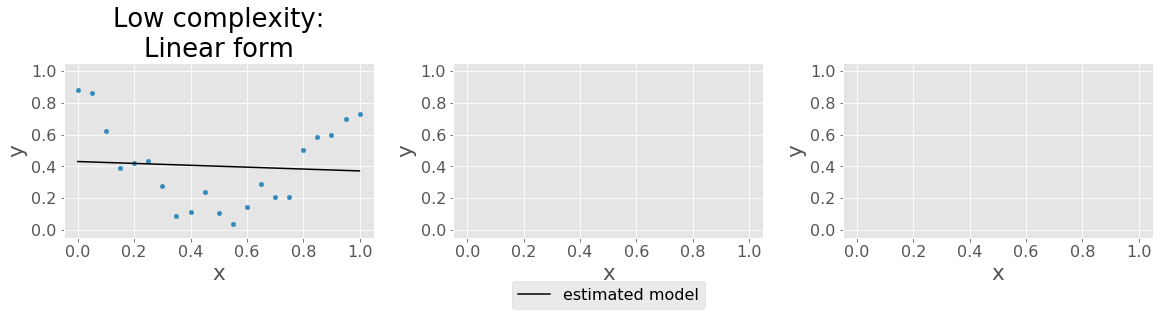

In [10]:
f_complexity[0]

## Model complexity (2)
*What does medium model complexity look like?*

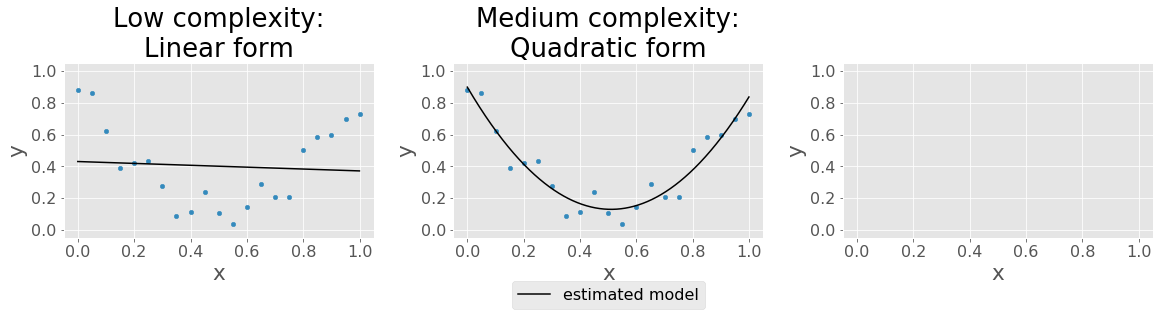

In [11]:
f_complexity[1]

## Model complexity (3)
*What does high model complexity look like?*

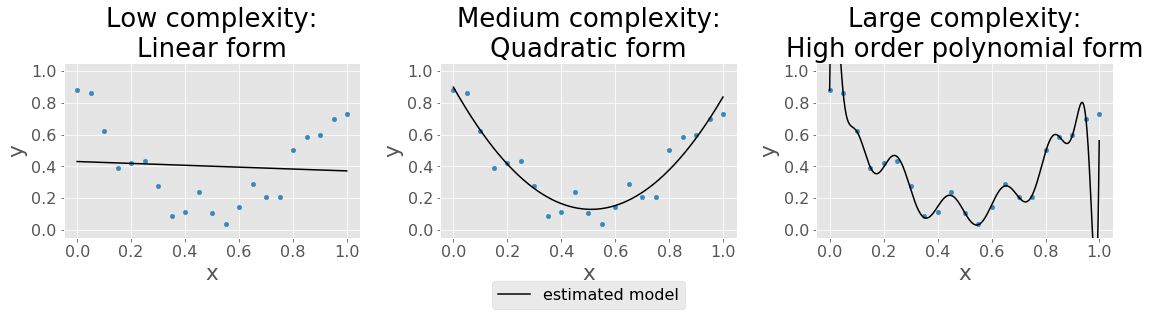

In [12]:
f_complexity[2]

## Model fitting (1)
*Quiz (1 min.): Which model fitted the data best?*

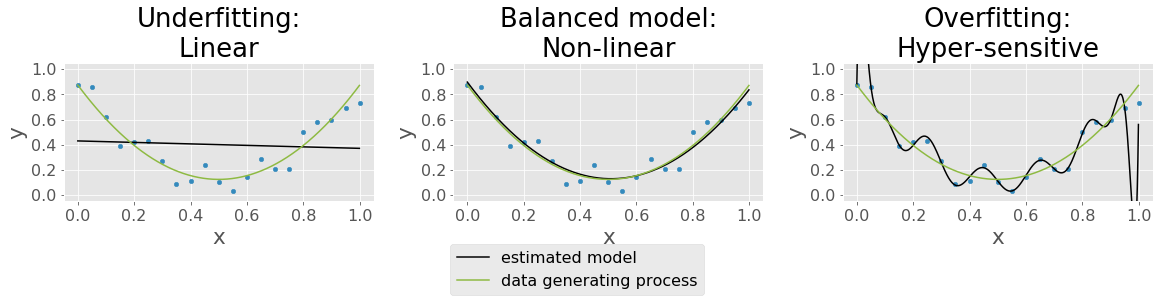

In [13]:
f_bias_var['regression'][2]

## Model fitting (2)
*What does underfitting and overfitting look like for classification?*

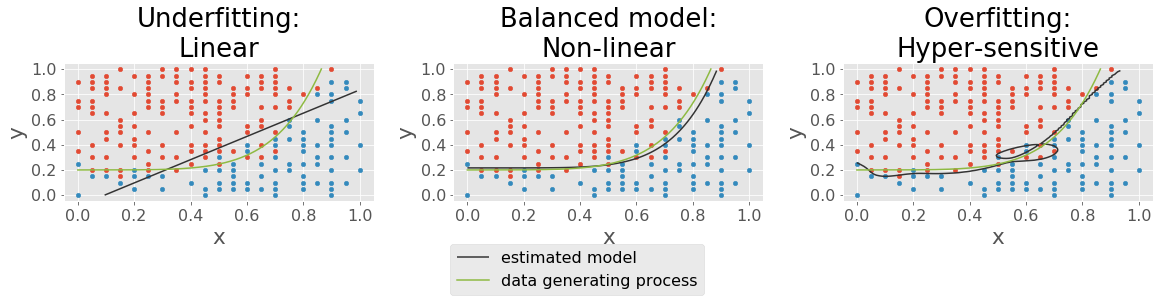

In [14]:
f_bias_var['classification'][2]

# Regression models: exact vs. approximate

## Estimation (1)
*Do we know already some ways to estimate regression models?*

- Social scientists know all about the Ordinary Least Squares (OLS).
- Some properties of OLS
    - Is applied to solve linear models.
    - Estimates both parameters and their standard deviation.
    - Is the best linear unbiased estimator under regularity conditions.     
    

*How is OLS estimated?*

- $\beta=(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}$ 
    - derived from by solving for $\beta$ in FOC: $ X'y=X'X\beta$ 
        - note: equivalent to: $ X'\varepsilon=0$

- computation requires non perfect multicollinarity.

## Estimation (2)
*How might we estimate a linear regression model?*

- first order methods (e.g. gradient descent)
- second order methods (Newton, quasi-Newton)
    - often faster, but may not always work
- what about local minima?
    - not a big problem in this course as we use linear models only
    - we should make grid search over random values

*So what the hell was gradient descent?*

- repeat the following: compute errors, multiply with features, and update coefficients

## Estimation (3)
*Can you explain that in details?*

- Yes, like with Adaline, we minimize the sum of squared errors (SSE): 
\begin{align}SSE&=\boldsymbol{e}^{T}\boldsymbol{e}\\\boldsymbol{e}&=\textbf{y}-\textbf{X}\textbf{w}\end{align}

In [20]:
X = np.random.normal(size=(3,2))
y = np.random.normal(size=(3))
w = np.random.normal(size=(3))

e = y-(w[0]+X.dot(w[1:]))
SSE = e.T.dot(e)

## Estimation (4)
*And what about the updating..? What is it about the first order deritative?*

\begin{align}
\frac{\partial SSE}{\partial\hat{\textbf{w}}}&=\textbf{X}^T\textbf{e}\qquad\text{(the gradient)}\\
 \Delta\hat{\textbf{w}}&=-\eta\cdot\textbf{X}^T\textbf{e}\qquad\text{(gradient descent)}\\
 &=-\eta\cdot\textbf{X}^T(\textbf{y}-\hat{\textbf{y}})\\ 
 &=-\eta\cdot\textbf{X}^T(\textbf{y}-\textbf{X}\hat{\textbf{w}})
\end{align}

In [16]:
eta = 0.001 # learning rate
fod = X.T.dot(e)
update_vars = eta*fod
update_bias = eta*e.sum()

## Estimation (5)
*What are some computational advantages relative to OLS?*

- OLS 
    - only works on linear models
    - Quadratic scaling in number of variables ($K$) is slow!
        - Computation complexity $\mathcal{O}(K^2N)$  ([read more](https://math.stackexchange.com/questions/84495/computational-complexity-of-least-square-regression-operation))

- Approximate methods: e.g. gradient descent 
    - Works despite high multicollinarity
    - Scales well: can be applied in subsets to very large datasets 
        - We only need subset in memory 
        - Note: not guaranteed convergence time!
    - Works on non-linear problems, e.g. neural networks.

## Fitting a polynomial (1)
Polyonomial: $f(x) = 2+8*x^4$

Try models of increasing order polynomials. 

- Split data into train and test (50/50)
- For polynomial order 0 to 9:
    - Iteration n: $y = \sum_{k=0}^{n}(\beta_k\cdot x^k)+\varepsilon$. (Taylor expansion)
    - Estimate order n model on training data
    - Evaluate with on test data with $\log RMSE$ ($= \log \sqrt{SSE/n}$)

## Fitting a polynomial (2)
We generate samples of data from true model (fourth order polynomial).

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def true_fct(X):
    return 2+X**4

n_samples = 25
np.random.seed(0)

X_train = np.random.normal(size=(n_samples,1))
y_train = true_fct(X_train).reshape(-1) + np.random.randn(n_samples) 

X_test = np.random.normal(size=(n_samples,1))
y_test = true_fct(X_test).reshape(-1) + np.random.randn(n_samples)

## Fitting a polynomial (3)
We estimate the polynomials and store MSE for train and test:

In [27]:
from sklearn.metrics import mean_squared_error as mse

test_mse = []
train_mse = []
parameters = []

max_degree = 15
degrees = range(max_degree+1)

for p in degrees:
    X_train_p = PolynomialFeatures(degree=p).fit_transform(X_train)
    X_test_p = PolynomialFeatures(degree=p).fit_transform(X_test)
    reg = LinearRegression().fit(X_train_p, y_train)
    train_mse += [mse(reg.predict(X_train_p),y_train)] 
    test_mse += [mse(reg.predict(X_test_p),y_test)]     
    parameters.append(reg.coef_)

## Fitting a polynomial (4)
*So what happens to the model performance in- and out-of-sample?*

Text(0, 0.5, 'Mean squared error')

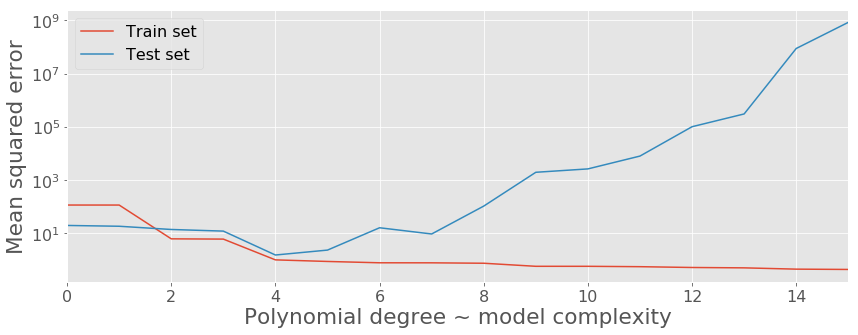

In [29]:
degree_index = pd.Index(degrees,name='Polynomial degree ~ model complexity')

ax = pd.DataFrame({'Train set':train_mse, 'Test set':test_mse})\
    .set_index(degree_index).plot(figsize=(14,5), logy=True)
ax.set_ylabel('Mean squared error')

## Fitting a polynomial (5)
*Quiz: Why does it go wrong on the test data?*

- more spurious parameters 
    - (we include variables beyond those in true model, i.e. $x^4$ and the bias term)
- the coefficient size increases (next slide)

## Fitting a polynomial (6)
*What do you mean coefficient size increase?*

Plot of mean coeffiecient/weight sizes.

Text(0, 0.5, 'Mean parameter size')

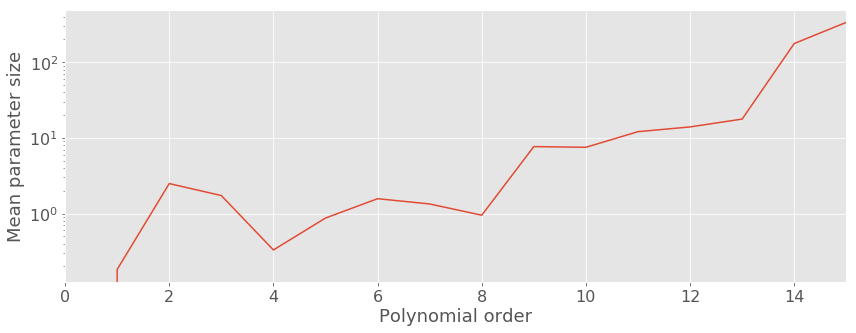

In [35]:
order_idx = pd.Index(range(n_degrees+1),name='Polynomial order')
ax = pd.DataFrame(parameters,index=order_idx)\
.abs().mean(1).plot(figsize=(14,5),logy=True)
ax.set_ylabel('Mean parameter size')

## Fitting a polynomial (7)
*How else could we visualize this problem?*

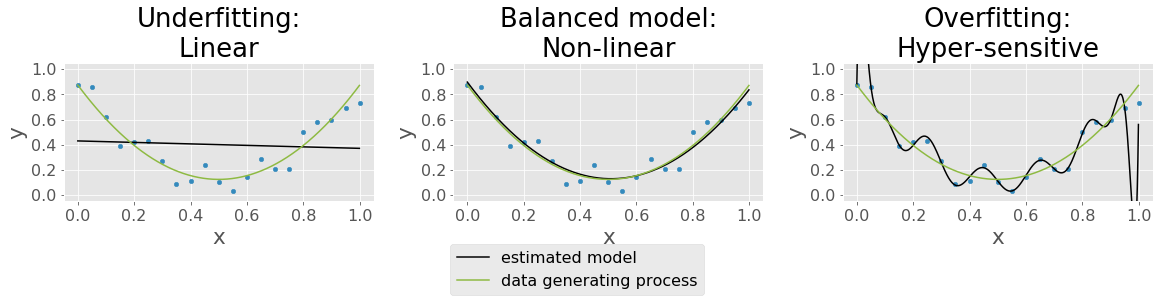

In [36]:
f_bias_var['regression'][2]

# The curse of overfitting and regularization

## Looking for a remedy
*How might we solve the overfitting problem?*

- too many number of variables (spurious relations)
- excessive magnitude of the coefficient size of variables 

Could we incorporate these two issues in our optimization problem?

## Regularization (1)

*Why do we regularize?*

- To mitigate overfitting > better model predictions

*How do we regularize?*

- We make models which are less complex:
  - reducing the **number** of coefficient;
  - reducing the **size** of the coefficients.

## Regularization (2)

*What does regularization look like?*

We add a penalty term our optimization procedure:
    
$$ \text{arg min}_\beta \, \underset{\text{MSE=SSE/n}}{\underbrace{E[(y_0 - \hat{f}(x_0))^2]}} + \underset{\text{penalty}}{\underbrace{\lambda \cdot R(\beta)}}$$

Introduction of penalties implies that increased model complexity has to be met with high increases precision of estimates.

## Regularization (3)

*What are some used penalty functions?*

The two most common penalty functions are L1 and L2 regularization.

- L1 regularization (***Lasso***): $R(\beta)=\sum_{j=1}^{p}|\beta_j|$ 
    - Makes coefficients sparse, i.e. selects variables by removing some (if $\lambda$ is high)
    
    
- L2 regularization (***Ridge***): $R(\beta)=\sum_{j=1}^{p}\beta_j^2$
    - Reduce coefficient size
    - Fast due to analytical solution
    
*To note:* The *Elastic Net* uses a combination of L1 and L2 regularization.

## Regularization (4)

*How the Lasso (L1 reg.) deviates from OLS*

<center><img src='http://rasbt.github.io/mlxtend/user_guide/general_concepts/regularization-linear_files/l1.png' alt="Drawing" style="width: 800px;"/></center>

## Regularization (5)

*How the Ridge regression (L2 reg.) deviates from OLS*

<center><img src='http://rasbt.github.io/mlxtend/user_guide/general_concepts/regularization-linear_files/l2.png' alt="Drawing" style="width: 550px;"/></center>

## Regularization (6)

*How might we describe the $\lambda$ of Lasso and Ridge?*

These are hyperparameters that we can optimize over. 

- More about this tomorrow.

## Regularization (7)

*Is there a generalization of of Lasso and Ridge?*

Yes, the elastic net allows both types of regularization. Thererfore, it has two hyperparameters.

# Implementation details

## Underfitting remedies
*Is it possible to solve the underfitting problem?*

Yes, there are in general two ways.
- Using polynomial interactions of all features.
    - This is known as Taylor expansion
    - Note: we need to use regularization too curb impact of overfitting!
- Using non-linear models who can capture all patterns.
    - These are called universal approximators
    - Return to an overview of these in Session 14.

## Underfitting remedies (2)
*Some of the models we see here, e.g. Perceptrons, seem too simple - are they ever useful?*

- No, not for serious machine learning. 
- But for exposition (your learning), yes.
- However, the perceptron and related models are building blocks for building neural networks.


## The devils in the details (1)

*So we just run regularization?*

# NO

We need to rescale our features:
- convert to zero mean: 
- standardize to unit std: 

Compute in Python:
- option 1: `StandardScaler` in `sklearn` (RECOMMENDED)
- option 2: `(X - np.mean(X)) / np.std(X)`



## The devils in the details (2)
*So we just scale our test and train?*

# NO

Fit to the distribution in the **training data first**, then rescale train and test! See more [here](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

## The devils in the details (3)
*So we just rescale before using polynomial features?*

# NO

Otherwise the interacted varaibles are not gaussian distributed.

## The devils in the details (4)
*Does sklearn's `PolynomialFeatures` work for more than variable?*

# YES!

# The end
[Return to agenda](#Agenda)

# Code for plots

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
%run ../ML_plots.ipynb